In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../data/Salary.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## Exploratory data analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

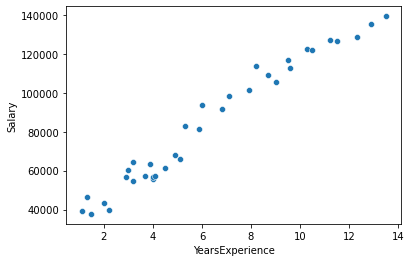

In [6]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

## Baseline model

In [20]:
# sklearn expects a 2D array so we need to reshape it
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = df['Salary']

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = lr.predict(X_valid)

In [23]:
rmse = mean_squared_error(y_valid, predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  6348.866720688848


## Feature engineering

We use the RMSE above as a baseline and build a model to improve this metric.

First, we check the distribution of the target variable.

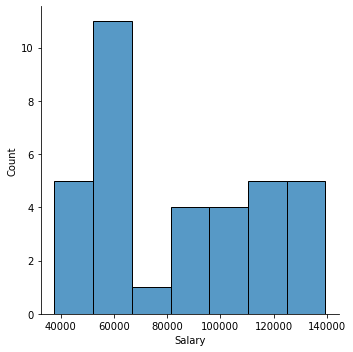

In [26]:
sns. displot(df['Salary'])

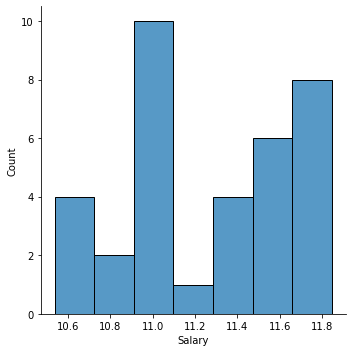

In [28]:
sns.displot(np.log1p(df.Salary))

In [29]:
# Train a model with the transformation above
X = np.array(df['YearsExperience']).reshape(-1, 1)
y = np.log1p(df.Salary)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_valid)

rmse = mean_squared_error(y_valid, predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  0.1182467337575975
